## Week 2 Basics

In [1]:
% matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use "ggplot" style for graphs

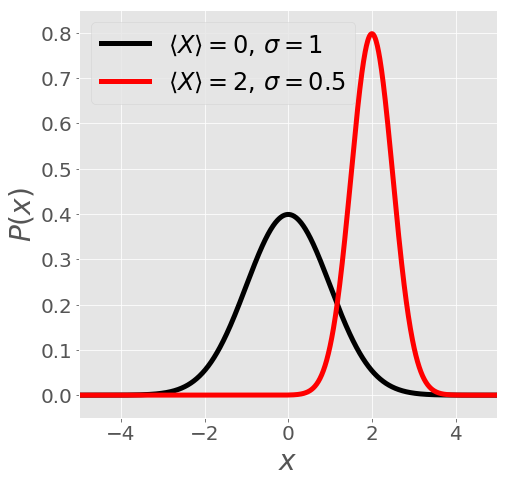

In [2]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.xlim(-5, 5)
plt.ylim(-0.05,0.85)
x = np.arange(-5, 5, 0.01)
###
std = 1.0
ave = 0.0
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2)
plt.plot(x, y, lw=5, color='k')
###
std = 0.5
ave = 2.0
y = np.exp(-(x-ave)**2/2/std**2)/np.sqrt(2*np.pi*std**2)
plt.plot(x, y, lw=5, color='r')
plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'$P(x)$', fontsize=28)
plt.legend([r'$\langle X \rangle=0$, $\sigma=1$',r'$\langle X \rangle=2$, $\sigma=0.5$'], fontsize=24)
#plt.legend([r'$\langle X \rangle=0$, $\sigma=1$'], fontsize=24)
plt.tick_params(labelsize=20)
plt.show()

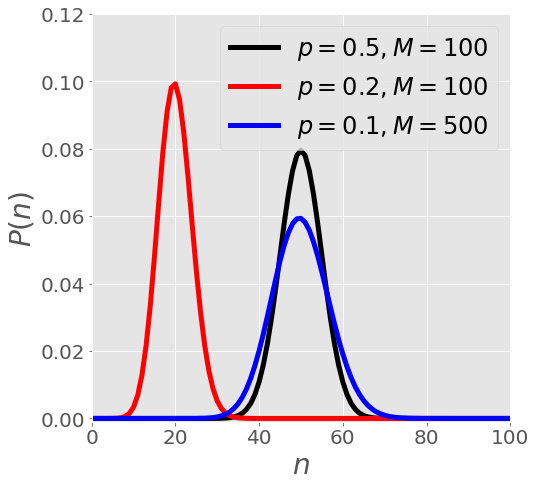

In [3]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.xlim(0, 100)
plt.ylim(-0.001,0.12)
#plt.ylim(0, 100)
def binomial(n,m,p):
    comb = math.factorial(m) / (math.factorial(n) * math.factorial(m-n))
    prob = comb * p ** n * (1 - p) ** (m - n)
    return prob
p = 0.5
M = 100
x = np.arange(M)
y = np.zeros(M)
for i in range(M):
    y[i]=binomial(i,M,p)
plt.plot(x, y, lw=5, color='k')
p = 0.2
M = 100
x = np.arange(M)
y = np.zeros(M)
for i in range(M):
    y[i]=binomial(i,M,p)
plt.plot(x, y, lw=5, color='r')
p = 0.1
M = 500
x = np.arange(M)
y = np.zeros(M)
for i in range(M):
    y[i]=binomial(i,M,p)
plt.plot(x, y, lw=5, color='b')
plt.xlabel(r'$n$', fontsize=28)
plt.ylabel(r'$P(n)$', fontsize=28)
ax.legend([r'$p=0.5,M=100$',r'$p=0.2,M=100$',r'$p=0.1,M=500$'], fontsize=24)
plt.tick_params(labelsize=20)
plt.show()

### Generating Gaussian Random Numbers

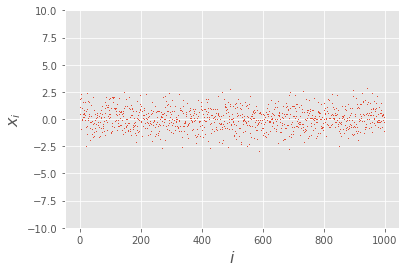

In [5]:
ave = 0.0
std = 1.0
N = 1000
np.random.seed(0)
X = ave + std * np.random.randn(N)

plt.ylim(-10,10)
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$x_i$', fontsize=16)
plt.plot(X, ',')
plt.show()

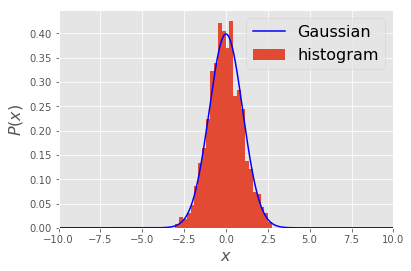

In [7]:
plt.hist(X, bins=25, normed=True)
x = np.arange(-10,10,.01)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)
plt.xlim(-10,10)
plt.plot(x,y,color='b')
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$P(x)$',fontsize=16)
plt.legend([r'Gaussian',r'histogram'], fontsize=16)
plt.show()

\sigma^2 = 1.0


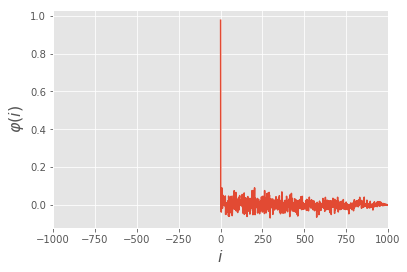

In [8]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[N-1:]

c = np.zeros(N)
c = auto_correlate(X-ave)/N

plt.plot(c)
plt.xlim(-1000,1000)
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$\varphi(i)$', fontsize=16)
print('\sigma^2 =',std**2)
plt.show()

### Generating random numbers from a Binomial Distribution

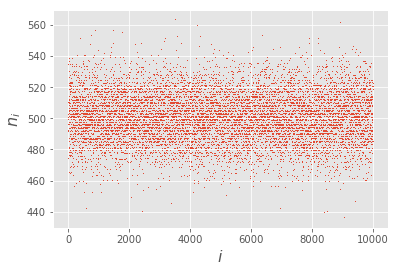

In [21]:
p = 0.5
M = 1000
N = 10000
np.random.seed(0)
X = np.random.binomial(M,p,N)

plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$n_i$', fontsize=16)
plt.plot(X, ',')
plt.show()

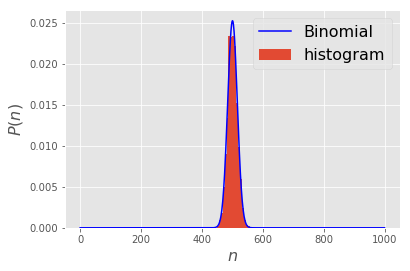

In [22]:
def binomial(n,m,p):
    comb = math.factorial(m)/(math.factorial(n)*math.factorial(m-n))
    prob = comb*p**n*(1-p)**(m-n)
    return prob

plt.hist(X, bins=20, normed=True)
x = np.arange(M)
y = np.zeros(M)

for i in range(M):
    y[i] = binomial(i,M,p)

plt.plot(x,y,color='b')
plt.xlabel(r'$n$',fontsize=16)
plt.ylabel(r'$P(n)$',fontsize=16)
plt.legend([r'Binomial',r'histogram'], fontsize=16)
plt.show()

\sigma^2 = 100.0


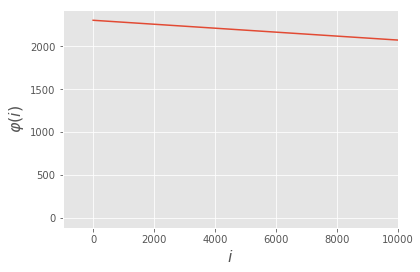

In [29]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[N-1:]

c = np.zeros(N)
c = auto_correlate(X-M*p)/N

plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$\varphi(i)$', fontsize=16)
print(r'\sigma^2 =',std**2)
plt.show()

### Generating random numbers from a Poisson Distribution

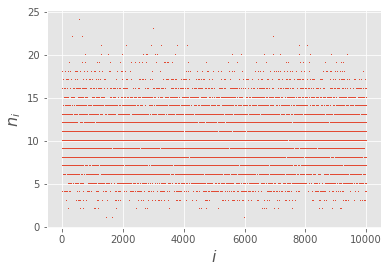

In [14]:
a = 10.0
N = 10000
np.random.seed(0)
X = np.random.poisson(a,N)

plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$n_i$', fontsize=16)
plt.plot(X, ',')
plt.show()

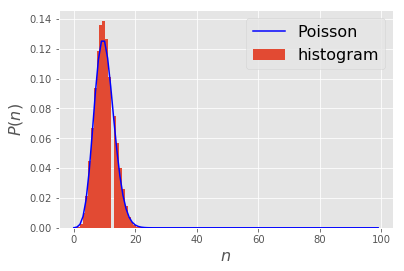

In [16]:
def poisson(n,a):
    prob = a**n*np.exp(-a)/math.factorial(n)
    return prob

plt.hist(X, bins=25, normed=True)
x = np.arange(M)
y = np.zeros(M)

for i in range(M):
    y[i] = poisson(i,a)

plt.plot(x,y,color='b')
plt.xlabel(r'$n$',fontsize=16)
plt.ylabel(r'$P(n)$',fontsize=16)
plt.legend([r'Poisson',r'histogram'], fontsize=16)
plt.show()

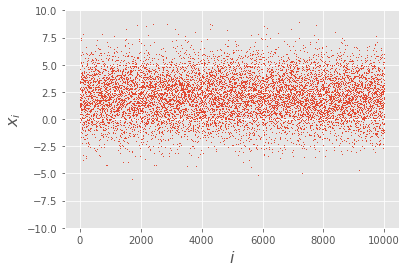

In [17]:
ave = 2.0
std = np.sqrt(4.0)
N = 10000
np.random.seed(1000)

#X = ave + std * np.random.randn(N)
X = np.random.normal(ave,std,N)

plt.ylim(-10,10)
plt.xlabel(r'$i$', fontsize=16)
plt.ylabel(r'$x_i$', fontsize=16)
plt.plot(X, ',')
plt.show()

### Central Limit Theorem

p = 0.5 M = 1000


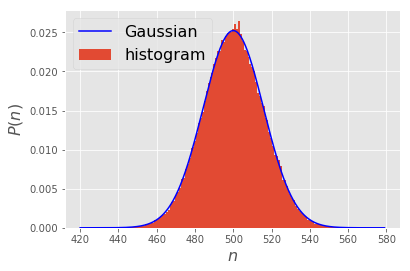

In [23]:
p = .5
M = 1000
N = 100000
ave = M*p
std = np.sqrt(M*p*(1-p))
print('p =', p, 'M =', M)

np.random.seed(0)

X = np.random.binomial(M, p, N)
nmin = np.int(ave-std * 5)
nmax = np.int(ave+std * 5)
nbin = nmax - nmin + 1

plt.hist(X, range=[nmin, nmax], bins=nbin, normed=True)

x = np.arange(nmin, nmax, .01/std)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

plt.plot(x,y, color='b')
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$P(n)$', fontsize=16)
plt.legend([r'Gaussian',r'histogram'], fontsize=16)
plt.show()

M = 4


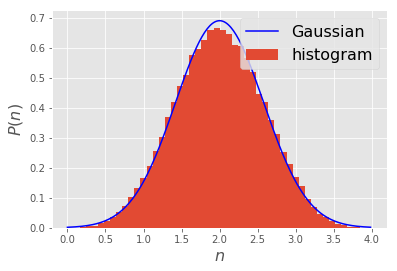

In [24]:
M = 4
N = 100000
ave = M/2
std = np.sqrt(M/12)
print('M =', M)

np.random.seed(0)

X = np.zeros(N)
for i in range(N):
    X[i] += np.sum(np.random.rand(M))

nmin = np.int(ave-std * 5)
nmax = np.int(ave+std * 5)
nbin = 50

plt.hist(X, range=[nmin, nmax], bins=nbin, normed=True)

x = np.arange(nmin, nmax, .01/std)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

plt.plot(x,y, color='b')
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$P(n)$', fontsize=16)
plt.legend([r'Gaussian',r'histogram'], fontsize=16)
plt.show()

## Random Walk

p = 0.5 M = 100


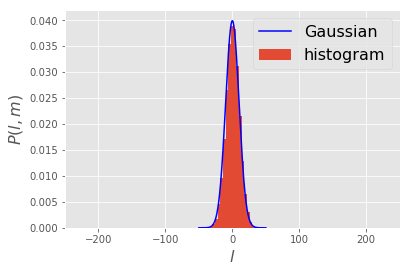

In [28]:
p = .5
M = 100
N = 100000
ave = M*(2*p-1)
std = np.sqrt(4*M*p*(1-p))
print('p =', p, 'M =', M)

L = np.zeros(N)
np.random.seed(0)

for i in range(N):
    step = np.random.choice([-1,1], M)
    L[i] = np.sum(step)

nmin = np.int(ave-std * 5)
nmax = np.int(ave+std * 5)
nbin = np.int((nmax-nmin)/4)

plt.hist(L, range=[nmin, nmax], bins=nbin, normed=True)

x = np.arange(nmin, nmax, .01/std)
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

plt.plot(x,y, color='b')
plt.xlabel(r'$l$', fontsize=16)
plt.ylabel(r'$P(l,m)$', fontsize=16)
plt.legend([r'Gaussian',r'histogram'], fontsize=16)
plt.xlim(ave-250, ave+250)
plt.show()